In [169]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
if os.name =='nt':
    font_family ="Malgun Gothic"
else:
    font_family="AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus": False})

In [170]:
#부산 음향신호기와 서울 음향신호기 차이 PCA

df=pd.read_csv('부산데이터셋.csv', encoding='euckr')
df

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,...,80,0,0,0,1,6,0,4,6,10
1,2,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,...,81,0,0,0,1,6,0,4,6,9
2,3,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,...,45,0,0,1,1,14,0,26,13,66
3,4,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,...,44,0,0,1,1,14,0,26,13,64
4,5,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,...,96,0,0,4,7,31,1,51,33,143
9050,9051,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,...,95,0,0,4,7,29,1,50,35,145
9051,9052,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,...,96,0,0,4,7,29,1,50,33,142
9052,9053,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,...,109,0,0,4,8,33,1,52,41,173


In [171]:
df.columns

Index(['index_부산 보행등', '교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터',
       '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고', 'label',
       'smart_label', '교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50',
       '안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50', '교육시설1',
       '도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1',
       '편의점1', '약국1', '병원1'],
      dtype='object')

In [172]:
df['label'] = np.where(df['label'] - df['smart_label'] == 1, 1, 0)

print(df['label'].value_counts())
print(df['smart_label'].value_counts())

0    8269
1     785
Name: label, dtype: int64
0    5666
1    3388
Name: smart_label, dtype: int64


In [173]:
data=df[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고', '교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50','안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50', '교육시설1','도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1','편의점1', '약국1', '병원1','label']]
data

,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,...,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1,label
0,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,145.445152,...,0,0,0,1,6,0,4,6,10,0
1,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,133.241979,...,0,0,0,1,6,0,4,6,9,0
2,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,285.997005,...,0,0,1,1,14,0,26,13,66,0
3,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,274.359834,...,0,0,1,1,14,0,26,13,64,0
4,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,150.637497,...,5,0,3,3,8,0,19,20,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,85.875810,...,0,0,4,7,31,1,51,33,143,1
9050,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,115.136919,...,0,0,4,7,29,1,50,35,145,1
9051,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,124.810210,...,0,0,4,7,29,1,50,33,142,1
9052,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,38.117834,...,0,0,4,8,33,1,52,41,173,0


In [174]:
scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원','교통사고']
df[scaler] = np.log(df[scaler])
df

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,7.790646,9.449756,4.953045,6.944919,9.426539,7.439482,6.930361,5.750491,8.350358,...,80,0,0,0,1,6,0,4,6,10
1,2,7.797929,9.450983,4.837738,6.957798,9.428136,7.446189,6.949078,5.723602,8.353959,...,81,0,0,0,1,6,0,4,6,9
2,3,8.771044,9.548567,4.318846,7.036929,9.183698,6.656194,5.352567,6.213751,7.427026,...,45,0,0,1,1,14,0,26,13,66
3,4,8.773080,9.549322,4.231676,7.027923,9.184180,6.669209,5.293319,6.194559,7.422785,...,44,0,0,1,1,14,0,26,13,64
4,5,8.688453,9.695075,3.600283,3.686309,9.646349,5.227972,5.948257,5.873268,8.888517,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,9.485295,9.186474,4.085994,7.048208,7.987243,6.448291,5.650400,5.523073,6.567713,...,96,0,0,4,7,31,1,51,33,143
9050,9051,9.483119,9.188400,4.409192,7.044466,7.980467,6.444956,5.739448,5.707547,6.529579,...,95,0,0,4,7,29,1,50,35,145
9051,9052,9.482190,9.186492,4.187648,7.029190,7.975477,6.416364,5.679907,5.712872,6.510276,...,96,0,0,4,7,29,1,50,33,142
9052,9053,9.498162,9.192052,4.091218,6.991585,8.039428,6.640413,5.916338,4.350408,6.784775,...,109,0,0,4,8,33,1,52,41,173


In [175]:
from sklearn.preprocessing import StandardScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수','교통사고']
rbs = StandardScaler()
data[scaler]=rbs.fit_transform(data[scaler])

C:\Users\user\AppData\Local\Temp\ipykernel_2492\1312970872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaler]=rbs.fit_transform(data[scaler])


In [176]:
data

,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,...,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1,label
0,-1.251930,0.208988,0.599763,-0.198589,0.236305,-0.024433,-0.047059,-0.641740,-0.294795,-0.323127,...,0,0,0,1,6,0,4,6,10,0
1,-1.249414,0.211714,0.439864,-0.189248,0.239398,-0.019418,-0.033275,-0.643982,-0.291049,-0.357081,...,0,0,0,1,6,0,4,6,9,0
2,-0.678638,0.439629,-0.089768,-0.129135,-0.180953,-0.429145,-0.626076,-0.591948,-0.920686,0.067949,...,0,0,1,1,14,0,26,13,66,0
3,-0.676768,0.441479,-0.154771,-0.136219,-0.180220,-0.424685,-0.634741,-0.594501,-0.922432,0.035570,...,0,0,1,1,14,0,26,13,64,0
4,-0.751371,0.826417,-0.488879,-0.891535,0.712079,-0.687999,-0.503430,-0.630702,0.445356,-0.308680,...,5,0,3,3,8,0,19,20,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,0.278004,-0.305054,-0.251522,-0.120173,-1.240145,-0.493058,-0.573821,-0.658929,-1.158457,-0.488875,...,0,0,4,7,31,1,51,33,143,1
9050,0.273929,-0.301764,-0.016141,-0.123158,-1.243243,-0.493978,-0.554927,-0.645292,-1.164991,-0.407458,...,0,0,4,7,29,1,50,35,145,1
9051,0.272193,-0.305023,-0.185511,-0.135227,-1.245512,-0.501748,-0.567746,-0.644860,-1.168205,-0.380542,...,0,0,4,7,29,1,50,33,142,1
9052,0.302275,-0.295509,-0.248292,-0.164162,-1.215564,-0.434476,-0.512015,-0.705406,-1.116122,-0.621758,...,0,0,4,8,33,1,52,41,173,0


In [177]:
target=df[['smart_label']]
target

,smart_label
0,1
1,1
2,1
3,1
4,1
...,...
9049,0
9050,0
9051,0
9052,1


from pandas.plotting import scatter_matrix

scatter_matrix(data, c=target['label'],marker='o', s=10,alpha=.8, figsize=(60,30))
plt.show()

In [178]:
numpy_test = np.array(data)

In [179]:
numpy_test

array([[-1.25193015e+00,  2.08987827e-01,  5.99763269e-01, ...,
         6.00000000e+00,  1.00000000e+01,  0.00000000e+00],
       [-1.24941406e+00,  2.11714470e-01,  4.39863591e-01, ...,
         6.00000000e+00,  9.00000000e+00,  0.00000000e+00],
       [-6.78638203e-01,  4.39629239e-01, -8.97675398e-02, ...,
         1.30000000e+01,  6.60000000e+01,  0.00000000e+00],
       ...,
       [ 2.72192675e-01, -3.05022992e-01, -1.85511316e-01, ...,
         3.30000000e+01,  1.42000000e+02,  1.00000000e+00],
       [ 3.02274634e-01, -2.95508627e-01, -2.48291535e-01, ...,
         4.10000000e+01,  1.73000000e+02,  0.00000000e+00],
       [ 2.98946774e-01, -2.94071586e-01, -3.87142625e-01, ...,
         4.00000000e+01,  1.69000000e+02,  0.00000000e+00]])

In [180]:
y=np.array(target)
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [181]:
from sklearn.decomposition import PCA
pca = PCA(random_state=1107)
pca.fit(numpy_test)
PC_score = pca.transform(numpy_test)
pca_df = pd.DataFrame(PC_score, index=data.index,columns=[f"pca{num+1}" for num in range(data.shape[1])])
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39
0,-58.859570,-22.621670,0.172449,-9.981535,1.874559,-1.873681,-1.982733,-2.414048,-0.867884,0.687024,...,0.027703,0.105596,0.172934,-0.062446,0.017022,0.009869,0.007452,0.000540,-0.000219,-0.000064
1,-59.349160,-23.911129,0.346643,-10.019187,1.762478,-1.879934,-2.954628,-2.467264,-0.881410,0.776121,...,0.032085,0.111374,0.173749,-0.066479,0.016782,0.010825,0.008390,0.000395,-0.000198,-0.000090
2,-17.001178,31.502657,6.880036,3.758927,-0.760061,4.905158,-0.259905,-2.237305,-1.591019,0.414329,...,0.054748,0.157402,-0.102662,0.007331,-0.000914,0.010148,-0.005780,0.000452,-0.000087,0.000034
3,-19.134115,31.568898,7.391638,4.165865,-0.832888,4.811802,-0.205688,-2.226648,-1.607321,0.413565,...,0.052721,0.162795,-0.100950,0.007056,-0.000626,0.010112,-0.005910,0.000494,-0.000091,0.000034
4,-34.339921,18.536873,4.954003,10.065902,6.028999,-4.212790,-1.575292,-1.471383,2.125168,-2.939905,...,0.902548,0.031809,0.264535,-0.013943,0.046541,-0.059525,0.000952,-0.018160,-0.000411,0.000445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,80.797950,16.003556,13.735709,6.426058,-4.296185,6.247606,2.089242,1.130262,-0.249788,1.497468,...,-0.021732,-0.507708,0.601959,0.061780,0.021780,-0.072544,-0.036526,0.000062,0.000745,-0.001324
9050,81.984418,17.548530,11.512320,6.835142,-6.446694,3.922340,2.202875,1.162991,-1.275202,0.162527,...,-0.028351,-0.507781,0.625692,0.061457,0.030110,-0.071527,-0.035324,-0.001092,0.000696,-0.001393
9051,79.401033,15.521339,11.731529,6.063597,-6.284975,5.491193,2.138346,1.034313,-1.173671,0.060790,...,-0.029132,-0.516541,0.627755,0.062622,0.028096,-0.072273,-0.035310,-0.000886,0.000707,-0.001420
9052,114.185378,16.336445,10.084431,7.473950,4.074990,2.571508,1.156471,1.694560,1.854506,5.156734,...,0.077164,-0.473461,0.524363,0.056620,0.011655,-0.080497,-0.022638,0.000832,0.000329,0.000373


In [182]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.867307
1     0.969451
2     0.979275
3     0.987254
4     0.993045
5     0.996939
6     0.997706
7     0.998304
8     0.998566
9     0.998812
10    0.999000
11    0.999162
12    0.999294
13    0.999402
14    0.999507
15    0.999608
16    0.999683
17    0.999749
18    0.999803
19    0.999843
20    0.999873
21    0.999899
22    0.999917
23    0.999933
24    0.999944
25    0.999954
26    0.999964
27    0.999972
28    0.999980
29    0.999986
30    0.999992
31    0.999997
32    0.999998
33    0.999999
34    1.000000
35    1.000000
36    1.000000
37    1.000000
38    1.000000
dtype: float64

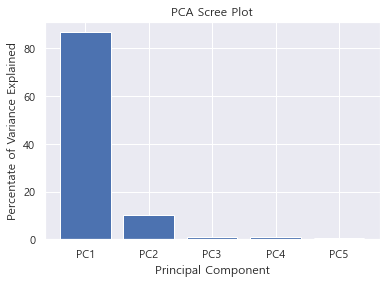

In [185]:
percent_variance = np.round(pca.explained_variance_ratio_[:5]* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    
    columns.append(f'PC{i+1}')
    
    
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [184]:
X_pp = pd.DataFrame(PC_score[:,:2], columns = ['PC1','PC2'], index = data.index)
X_pp

,PC1,PC2
0,-58.859570,-22.621670
1,-59.349160,-23.911129
2,-17.001178,31.502657
3,-19.134115,31.568898
4,-34.339921,18.536873
...,...,...
9049,80.797950,16.003556
9050,81.984418,17.548530
9051,79.401033,15.521339
9052,114.185378,16.336445


In [118]:
pca.components_

array([[-6.69140026e-03, -3.49022037e-03, -2.20155483e-03, ...,
         1.78585194e-01,  8.71981232e-01,  4.58363896e-04],
       [ 4.47227377e-03,  3.25263421e-03,  9.42715592e-03, ...,
        -6.57311820e-02,  4.17997413e-01, -5.23469857e-04],
       [-1.23797060e-02, -2.00522479e-02,  5.99462568e-03, ...,
         1.73512627e-01, -2.15716794e-01,  2.50226494e-03],
       ...,
       [-8.14985492e-04, -5.36705734e-04, -2.27600169e-04, ...,
        -9.62214918e-05,  5.36597617e-06,  8.72119336e-04],
       [ 1.40161406e-04,  6.60023854e-05,  1.03248584e-04, ...,
        -9.04254826e-06, -3.54056930e-06,  8.58449962e-04],
       [-4.44815316e-05, -5.60153402e-05,  7.22878116e-05, ...,
         5.63557410e-06, -1.77647942e-06, -1.46265076e-03]])

In [119]:
pca.explained_variance_

array([6.79008349e+03, 7.99684825e+02, 7.69094800e+01, 6.24662297e+01,
       4.53337560e+01, 3.04870922e+01, 6.00991785e+00, 4.67752496e+00,
       2.04856696e+00, 1.93295671e+00, 1.46948390e+00, 1.26895443e+00,
       1.03300901e+00, 8.39871953e-01, 8.22332507e-01, 7.92604798e-01,
       5.92028514e-01, 5.12159309e-01, 4.24735699e-01, 3.15944397e-01,
       2.33782339e-01, 2.03931530e-01, 1.40868961e-01, 1.22652646e-01,
       8.86277598e-02, 7.55697977e-02, 7.48569482e-02, 6.57061592e-02,
       6.05551432e-02, 5.23651803e-02, 4.07205458e-02, 3.87961467e-02,
       1.01863789e-02, 7.55655682e-03, 7.14657462e-03, 1.47821261e-03,
       6.59988896e-04, 2.16223129e-04, 1.08807505e-04])

In [120]:
ratio = pca.explained_variance_ratio_
ratio

array([8.67306623e-01, 1.02144833e-01, 9.82375275e-03, 7.97889670e-03,
       5.79054247e-03, 3.89415786e-03, 7.67655003e-04, 5.97466641e-04,
       2.61666252e-04, 2.46899196e-04, 1.87699182e-04, 1.62085280e-04,
       1.31947649e-04, 1.07277990e-04, 1.05037653e-04, 1.01240492e-04,
       7.56206093e-05, 6.54188069e-05, 5.42520701e-05, 4.03560086e-05,
       2.98613370e-05, 2.60484524e-05, 1.79933844e-05, 1.56665898e-05,
       1.13205446e-05, 9.65263330e-06, 9.56158007e-06, 8.39273731e-06,
       7.73479102e-06, 6.68867589e-06, 5.20129084e-06, 4.95548472e-06,
       1.30112006e-06, 9.65209306e-07, 9.12841722e-07, 1.88814112e-07,
       8.43012816e-08, 2.76184751e-08, 1.38981310e-08])

,V_ration
PC1,0.867307
PC2,0.102145
PC3,0.009824
PC4,0.007979


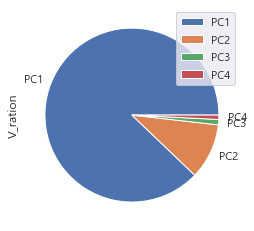

In [121]:
df_v = pd.DataFrame(ratio[:4], index=['PC1','PC2','PC3','PC4'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [122]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,6790.083489,8.673066e-01,0.867307
pca2,799.684825,1.021448e-01,0.969451
pca3,76.909480,9.823753e-03,0.979275
pca4,62.466230,7.978897e-03,0.987254
pca5,45.333756,5.790542e-03,0.993045
pca6,30.487092,3.894158e-03,0.996939
pca7,6.009918,7.676550e-04,0.997706
pca8,4.677525,5.974666e-04,0.998304
pca9,2.048567,2.616663e-04,0.998566
pca10,1.932957,2.468992e-04,0.998812


In [86]:
PCs = PC_score[:,:2]
PCs

array([[-58.84958493, -22.64337309],
       [-59.33892947, -23.93322772],
       [-16.96084345,  31.39530154],
       ...,
       [ 79.43066486,  15.51506336],
       [114.21192378,  16.35092934],
       [110.78200914,  14.62607645]])

In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,df['smart_label'], test_size=0.2, random_state=42, \
                                                    stratify=df2['smart_label'])

x_train=x_train.drop(['index_부산 보행등','smart_label','label'],axis=1)
x_test=x_test.drop(['index_부산 보행등','smart_label','label'],axis=1)

In [98]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(numpy_test, y)
some_predicted2 = model2.predict(numpy_test)
print(model2.score(numpy_test, y))

0.7447537000220897


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
confusion_matrix(y,some_predicted2)

array([[3519, 1362],
       [ 949, 3224]], dtype=int64)

In [101]:
model22 = LogisticRegression()
model22.fit(PCs,y)
some_predicted22 = model22.predict(PCs)
confusion_matrix(y,some_predicted22)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3548, 1333],
       [1941, 2232]], dtype=int64)

In [89]:
#의사결정트리
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted3 = model3.predict(x_test)
mse3 = np.sqrt(mean_squared_error(some_predicted3, y_test))
print('평균제곱근오차', mse3)

평균제곱근오차 0.30275743617188267


In [93]:
accuracy_score(y_test, some_predicted3)

0.9083379348426284

In [90]:
#SVM
from sklearn import svm
model4 = svm.SVC()
model4.fit(x_train, y_train)
some_predicted4=model4.predict(x_test)
accuracy_score(y_test, some_predicted4)

0.6537824406405301

In [91]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted5 = model5.predict(x_test)
mse5= np.sqrt(mean_squared_error(some_predicted5,y_test))
print('평균제곱근오차', mse5)

평균제곱근오차 0.21017728048594655


In [92]:
print(model5.score(x_train, y_train))

1.0


In [ ]:
dfs=pd.read_csv('서울_정답포함.csv', encoding='euckr')
dfs.head()

In [ ]:
dfs.columns

In [ ]:
dfs2=dfs[]
y=dfs2[['label']]
y

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수']
rbs = RobustScaler()
dfs[scaler]=rbs.fit_transform(dfs[scaler])

from pca import pca

model = pca(n_components=5)
results = model.fit_transform(data)
fig, ax = model.biplot(n_feat=5, legend=False)

In [16]:
from sklearn.linear_model import LogisticRegression      ## 로지스틱 회귀분석
from sklearn.naive_bayes import GaussianNB               ## 나이브 베이즈
from sklearn import svm                                  ## 서포트 벡터 머신
from sklearn import tree                                 ## 의사결정나무
from sklearn.ensemble import RandomForestClassifier      ##랜덤포레스트

In [ ]:
print(model5.score(x_train, y_train))

In [19]:
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(numpy_test,y)
pred = clf.predict(numpy_test)
confusion_matrix(y,pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3176, 1705],
       [ 715, 3458]], dtype=int64)

In [20]:
clf.score(numpy_test,y)

0.7327148221780428

In [21]:
clf.fit(PC_score,y)
pred = clf.predict(PC_score)
confusion_matrix(y,pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3174, 1707],
       [ 715, 3458]], dtype=int64)

In [22]:
clf.score(numpy_test,y)

0.35255135851557323

In [ ]:
dfs=pd.read_csv('서울_정답포함.csv', encoding='euckr')
dfs.head()

In [ ]:
dfs.columns

In [ ]:
dfs2=dfs
y=dfs2[['label']]
y

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수']
rbs = RobustScaler()
dfs[scaler]=rbs.fit_transform(dfs[scaler])

In [ ]:
dfs=dfs.drop(['신호등_index','label'],axis=1)

In [ ]:
clf.predict(dfs)
clf.score(dfs,y)

In [ ]:
gnb.predict(dfs)
gnb.score(dfs, y)

In [ ]:
clf2.predict(dfs)
clf2.score(dfs,y)

In [ ]:
clf3.predict(dfs)
clf3.score(dfs,y)

In [ ]:
clf4.predict(dfs)
clf4.score(dfs,y)

In [ ]:
##PCA 비교

In [30]:
df2=pd.read_csv('부산데이터셋.csv', encoding='euckr')
df2

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,...,80,0,0,0,1,6,0,4,6,10
1,2,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,...,81,0,0,0,1,6,0,4,6,9
2,3,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,...,45,0,0,1,1,14,0,26,13,66
3,4,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,...,44,0,0,1,1,14,0,26,13,64
4,5,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,...,96,0,0,4,7,31,1,51,33,143
9050,9051,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,...,95,0,0,4,7,29,1,50,35,145
9051,9052,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,...,96,0,0,4,7,29,1,50,33,142
9052,9053,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,...,109,0,0,4,8,33,1,52,41,173


In [31]:
df2['label'] = np.where(df2['label'] - df2['smart_label'] == 1, 1, 0)

print(df2['label'].value_counts())
print(df2['smart_label'].value_counts())

0    8269
1     785
Name: label, dtype: int64
0    5666
1    3388
Name: smart_label, dtype: int64


In [32]:
df2.columns

Index(['index_부산 보행등', '교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터',
       '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고', 'label',
       'smart_label', '교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50',
       '안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50', '교육시설1',
       '도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1',
       '편의점1', '약국1', '병원1'],
      dtype='object')

In [33]:
scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원','교통사고']
df2[scaler] = np.log(df2[scaler])
df2

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,7.790646,9.449756,4.953045,6.944919,9.426539,7.439482,6.930361,5.750491,8.350358,...,80,0,0,0,1,6,0,4,6,10
1,2,7.797929,9.450983,4.837738,6.957798,9.428136,7.446189,6.949078,5.723602,8.353959,...,81,0,0,0,1,6,0,4,6,9
2,3,8.771044,9.548567,4.318846,7.036929,9.183698,6.656194,5.352567,6.213751,7.427026,...,45,0,0,1,1,14,0,26,13,66
3,4,8.773080,9.549322,4.231676,7.027923,9.184180,6.669209,5.293319,6.194559,7.422785,...,44,0,0,1,1,14,0,26,13,64
4,5,8.688453,9.695075,3.600283,3.686309,9.646349,5.227972,5.948257,5.873268,8.888517,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,9.485295,9.186474,4.085994,7.048208,7.987243,6.448291,5.650400,5.523073,6.567713,...,96,0,0,4,7,31,1,51,33,143
9050,9051,9.483119,9.188400,4.409192,7.044466,7.980467,6.444956,5.739448,5.707547,6.529579,...,95,0,0,4,7,29,1,50,35,145
9051,9052,9.482190,9.186492,4.187648,7.029190,7.975477,6.416364,5.679907,5.712872,6.510276,...,96,0,0,4,7,29,1,50,33,142
9052,9053,9.498162,9.192052,4.091218,6.991585,8.039428,6.640413,5.916338,4.350408,6.784775,...,109,0,0,4,8,33,1,52,41,173


In [34]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수','교통사고']
rbs = RobustScaler()
data[scaler]=rbs.fit_transform(data[scaler])

C:\Users\user\AppData\Local\Temp\ipykernel_2492\3177063250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaler]=rbs.fit_transform(data[scaler])


In [35]:
target=df[['smart_label']]
target

,smart_label
0,1
1,1
2,1
3,1
4,1
...,...
9049,0
9050,0
9051,0
9052,1


In [36]:
data=df[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고', '교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50','안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50', '교육시설1','도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1','편의점1', '약국1', '병원1','label']]
data

,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,...,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1,label
0,7.790646,9.449756,4.953045,6.944919,9.426539,7.439482,6.930361,5.750491,8.350358,4.979799,...,0,0,0,1,6,0,4,6,10,1
1,7.797929,9.450983,4.837738,6.957798,9.428136,7.446189,6.949078,5.723602,8.353959,4.892167,...,0,0,0,1,6,0,4,6,9,1
2,8.771044,9.548567,4.318846,7.036929,9.183698,6.656194,5.352567,6.213751,7.427026,5.655981,...,0,0,1,1,14,0,26,13,66,1
3,8.773080,9.549322,4.231676,7.027923,9.184180,6.669209,5.293319,6.194559,7.422785,5.614441,...,0,0,1,1,14,0,26,13,64,1
4,8.688453,9.695075,3.600283,3.686309,9.646349,5.227972,5.948257,5.873268,8.888517,5.014876,...,5,0,3,3,8,0,19,20,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9.485295,9.186474,4.085994,7.048208,7.987243,6.448291,5.650400,5.523073,6.567713,4.452902,...,0,0,4,7,31,1,51,33,143,1
9050,9.483119,9.188400,4.409192,7.044466,7.980467,6.444956,5.739448,5.707547,6.529579,4.746122,...,0,0,4,7,29,1,50,35,145,1
9051,9.482190,9.186492,4.187648,7.029190,7.975477,6.416364,5.679907,5.712872,6.510276,4.826794,...,0,0,4,7,29,1,50,33,142,1
9052,9.498162,9.192052,4.091218,6.991585,8.039428,6.640413,5.916338,4.350408,6.784775,3.640682,...,0,0,4,8,33,1,52,41,173,1


In [37]:
x = np.array(data)

In [38]:
y=np.array(target)

In [39]:
feature_names = data.columns

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

# 모델 생성 / 최대 iter 2000 / 다중 분류이므로 multi_class 적용
clf = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial', 
                        solver='sag')
clf.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=0,
                   solver='sag')

In [50]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=0,
                   solver='sag')

In [51]:
pred = clf.predict(x_test)
print(accuracy_score(y_test, pred))

0.906129210381005


In [53]:
pca = PCA()
pca.fit(x)

PCA()

In [54]:
pcscore = pca.transform(x)

In [55]:
pca.explained_variance_

array([2.30410509e+05, 5.87473606e+03, 7.98297843e+02, 7.58351884e+01,
       6.28629040e+01, 4.54371330e+01, 2.91407940e+01, 6.04581582e+00,
       2.24931650e+00, 2.15009821e+00, 1.94584381e+00, 1.43481264e+00,
       1.33313728e+00, 1.06313134e+00, 8.35245097e-01, 6.21090312e-01,
       5.92976376e-01, 4.66274488e-01, 4.21232446e-01, 3.86101311e-01,
       3.44479990e-01, 3.31921921e-01, 3.02311252e-01, 2.75536428e-01,
       2.13778143e-01, 1.77183450e-01, 1.67871872e-01, 1.31263473e-01,
       4.62832448e-02, 3.74015603e-02, 3.49779653e-02, 2.84512165e-02,
       8.65525282e-03, 6.44945996e-03, 5.30289942e-03, 1.42485869e-03,
       6.43356054e-04, 2.15342361e-04, 1.08761329e-04])

<AxesSubplot:>

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

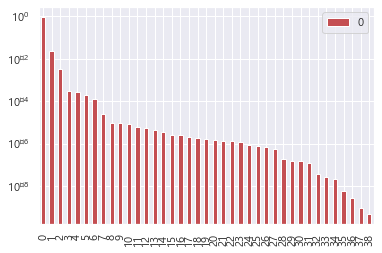

In [57]:
PC_ratio = pca.explained_variance_ratio_
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar', logy=True, color='r')

In [58]:
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
cf1 = confusion_matrix(y_test, pred)
print(cf1)
print(accuracy_score(y_test, pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[971 144]
 [ 26 670]]
0.906129210381005


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [59]:
clf2.fit(train_score, y_train)
pred2 = clf2.predict(test_score)
cf2 = confusion_matrix(y_test, pred2)
print(cf2)
print(accuracy_score(y_test, pred2))

NameError: name 'clf2' is not defined